In [1]:
#!/usr/bin/env python3
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass

texDict = {'$m_S$ = %1.0f GeV' : 'ms',
           '$m_1 = $ %1.0f GeV' : 'm1',
        #    '$m_0 = $ %1.2f GeV' : 'm0',
           '$\\Delta m_{10} = $ %1.0f GeV' : 'dm',
           '$c \\tau = $ %1.0f m' : 'ctau'}

axisDict = {'$m_S$ (GeV)' : 'ms',
           '$m_1$ (GeV)' : 'm1',
        #    '$m_0 = $ %1.2f GeV' : 'm0',
           '$\\Delta m_{10}$ (GeV)' : 'dm',
           '$c \\tau (m)$' : 'ctau',
           '$\\epsilon_{\\rm Trigger}$' : 'eff'}

varDict = {val : key for key,val in axisDict.items()}

def getTitleFromDF(df):

    title = []
    for texLabel,label in texDict.items():
        if len(df[label].unique()) > 1:
            continue
        val = df[label].unique()[0]
        title.append((texLabel % val))

    return r', '.join(title)

def getAxisLabel(df):
    
    axVars = []
    for texLabel,label in axisDict.items():
        if len(df[label].unique()) > 1:
            axVars.append(texLabel)
            
    if len(axVars) == 1:
        return (r'%s' %axVars[0])
    else:
        return 'x(?)'

### Get Tobias data

In [2]:
b2tf_effs = np.genfromtxt('./JZ_numerics/b2tf_effs.csv',delimiter=',',names=True)
b2tf_data_df = pd.DataFrame(b2tf_effs,columns=b2tf_effs.dtype.names)
b2tf_data_df['dm'] = b2tf_data_df['m1']-b2tf_data_df['m0']

### Get B2TF recast data

In [3]:
b2tf_effs_R = np.genfromtxt('./b2tf_trigger_effs.csv',delimiter=',',names=True)
b2tf_data_df_R = pd.DataFrame(b2tf_effs_R,columns=b2tf_effs_R.dtype.names)
b2tf_data_df_R['dm'] = b2tf_data_df_R['m1']-b2tf_data_df_R['m0']

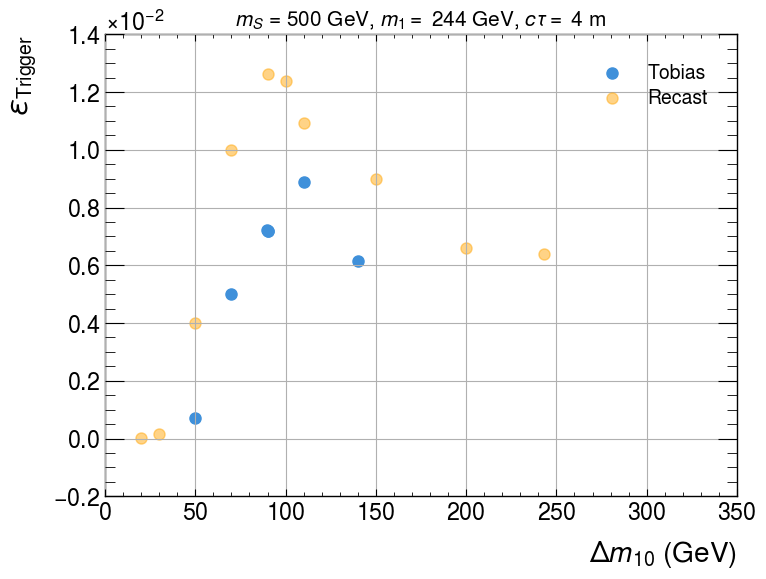

In [4]:
constraints = {'ms' : 500.0, 'ctau' : 4.0}
xaxis = 'dm'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter = b2tf_data_df.copy()
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter = b2tf_data_df_filter[(np.abs(b2tf_data_df_filter[label]-val) < 0.1)]
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]
b2tf_data_df_filter = b2tf_data_df_filter.sort_values(xaxis)

plt.scatter(b2tf_data_df_filter[xaxis],b2tf_data_df_filter[yaxis],label='Tobias')
plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=0.5)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
plt.xlim(0,350.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()

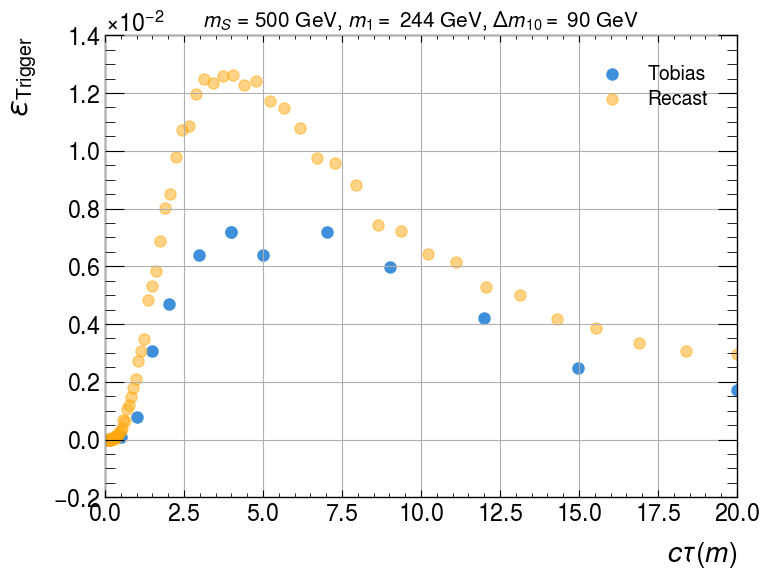

In [5]:
constraints = {'ms' : 500.0, 'dm' : 90.0}
xaxis = 'ctau'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter = b2tf_data_df.copy()
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter = b2tf_data_df_filter[(np.abs(b2tf_data_df_filter[label]-val) < 0.1)]
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]
b2tf_data_df_filter = b2tf_data_df_filter.sort_values(xaxis)

plt.scatter(b2tf_data_df_filter[xaxis],b2tf_data_df_filter[yaxis],label='Tobias')
plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=0.5)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
# plt.xlim(0,350.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()

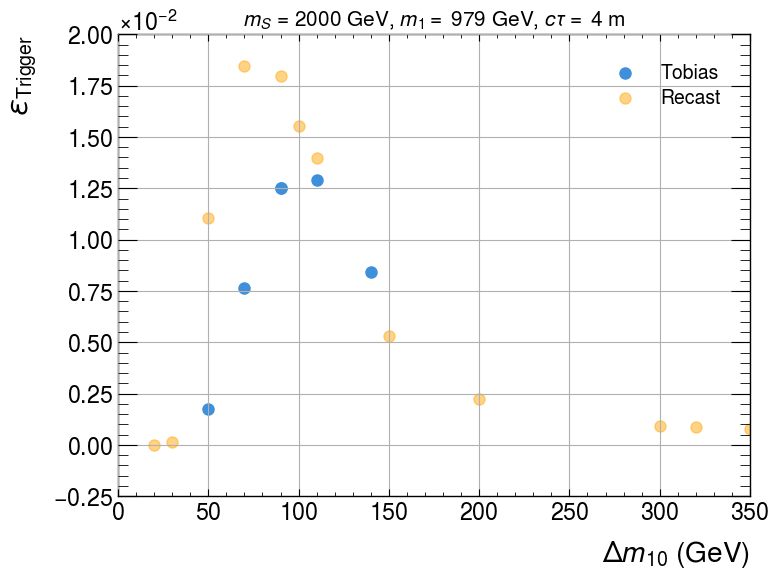

In [8]:
constraints = {'ms' : 2000.0, 'ctau' : 4.0}
xaxis = 'dm'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter = b2tf_data_df.copy()
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter = b2tf_data_df_filter[(np.abs(b2tf_data_df_filter[label]-val) < 0.1)]
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]
b2tf_data_df_filter = b2tf_data_df_filter.sort_values(xaxis)

plt.scatter(b2tf_data_df_filter[xaxis],b2tf_data_df_filter[yaxis],label='Tobias')
plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=0.5)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
# plt.xlim(0,350.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()

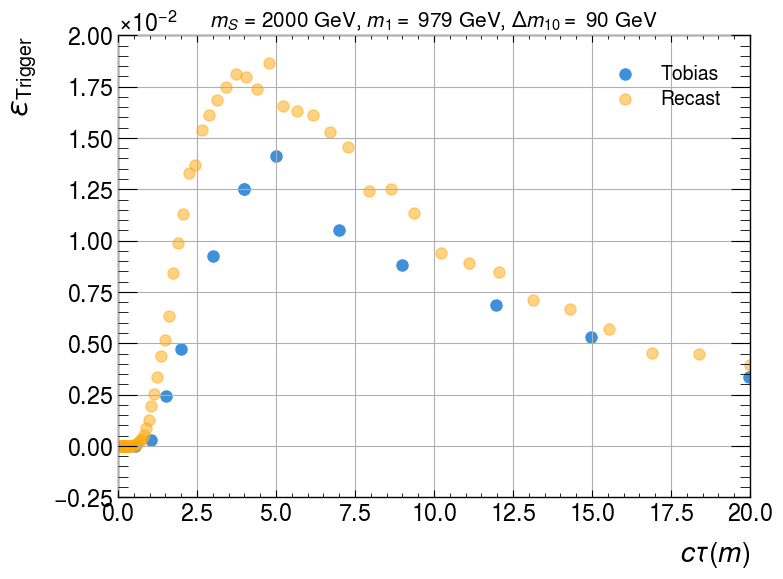

In [9]:
constraints = {'ms' : 2000.0, 'dm' : 90.0}
xaxis = 'ctau'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter = b2tf_data_df.copy()
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter = b2tf_data_df_filter[(np.abs(b2tf_data_df_filter[label]-val) < 0.1)]
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]
b2tf_data_df_filter = b2tf_data_df_filter.sort_values(xaxis)

plt.scatter(b2tf_data_df_filter[xaxis],b2tf_data_df_filter[yaxis],label='Tobias')
plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=0.5)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
# plt.xlim(0,350.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()